In [7]:
#!/usr/bin/env python
# coding: utf-8

# In[76]:


import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt 
import sys
import time


# In[77]:


#Filename =sys.argv[1] # Read input file 
df = pd.read_excel('sequenceInput.xlsx')


# In[78]:


df=df.dropna().reset_index(drop=True)
data= pd.DataFrame()
data=df

def get_integer_value(newdata):
    return re.findall('\d+',newdata)

# In[79]:


sulfide=df['Disulfide bond']
def get_sulfide_value(newdata):
    return re.findall('\d+\..\d+',newdata)

values= sulfide.apply(get_sulfide_value)
data['Disulfide bond']=values


# In[80]:
human_data=data[data['Organism'].str.contains("Homo sapiens")] #Selecting only organism which contains 'Homo sapiens'
data= human_data.reset_index(drop=True)

#Intrabond distance formation

lenB=pd.Series(data['Disulfide bond']).str.len()
intrabond=pd.Series(len(data),dtype=np.str)
for i in range(len(data)):
    intrabond[i]=''
j=0;
while j<len(data):
    for k in range(lenB[j]):
        split = re.findall('\d+',data['Disulfide bond'][j][k]) 
        firstPair= int(split[0])
        secondPair=int(split[1])
        intrabond[j]=intrabond[j]+str(secondPair-firstPair)+','    
    j=j+1
data['intrabond']=intrabond.apply(get_integer_value)


# In[81]:


#Calculating length of sequences
Sequence_Length=pd.Series(data['Sequence']).str.len()
position = pd.Series(len(data),dtype=np.str)
for i in range(len(data)):
    position[i]=''


# In[82]:


for i in range(len(data)):
    for j in range((Sequence_Length[i])):
        if (data['Sequence'][i][j])=='C':
            position[i]=position[i]+','+str(j)


# In[83]:




data['Sequence C position']= position.apply(get_integer_value)
count =pd.Series(data['Sequence C position'])
length=count.str.len()
data['Sequence C count']=length


# In[84]:


pos = pd.Series(len(data),dtype=np.str)
for i in range(len(data)):
    pos[i]=''


for i in range(len(data)):
    for j in range(len(data['Sequence'][i])-2):
        if data['Sequence'][i][j]=='N' and data['Sequence'][i][j+1]!='P' and (data['Sequence'][i][j+2]=='S' or data['Sequence'][i][j+2]=='T'):
            pos[i]=pos[i]+str(j)+','
data['N_X_S/T']=pos.apply(get_integer_value)
data['Sequence N_X_S/T count']=pd.Series(data['N_X_S/T']).str.len()           


# In[86]:


data.to_excel('sequenceOutput.xlsx')


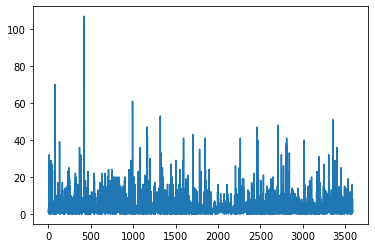

In [2]:
plt.plot(data['Sequence N_X_S/T count'])
plt.plot(data['Sequence C count'])

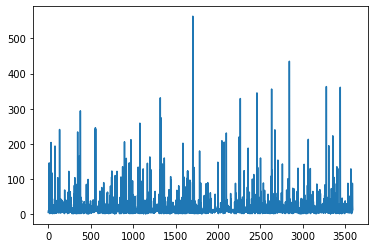

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Sequence,Disulfide bond
0,P04439,HLAA_HUMAN,reviewed,"HLA class I histocompatibility antigen, A alph...",HLA-A HLAA,Homo sapiens (Human),365,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,"DISULFID 125..188; /evidence=""ECO:0000255|PRO..."
1,P31689,DNJA1_HUMAN,reviewed,DnaJ homolog subfamily A member 1 (DnaJ protei...,DNAJA1 DNAJ2 HDJ2 HSJ2 HSPF4,Homo sapiens (Human),397,MVKETTYYDVLGVKPNATQEELKKAYRKLALKYHPDKNPNEGEKFK...,NaN
2,P01911,DRB_HUMAN,reviewed,"HLA class II histocompatibility antigen, DRB1 ...",HLA-DRB1,Homo sapiens (Human),266,MVCLKLPGGSCMTALTVTLMVLSSPLALSGDTRPRFLWQPKRECHF...,"DISULFID 44..108; /evidence=""ECO:0000269|PubM..."
3,P01889,HLAB_HUMAN,reviewed,"HLA class I histocompatibility antigen, B alph...",HLA-B HLAB,Homo sapiens (Human),362,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,"DISULFID 125..188; /evidence=""ECO:0000255|PRO..."
4,P08246,ELNE_HUMAN,reviewed,Neutrophil elastase (EC 3.4.21.37) (Bone marro...,ELANE ELA2,Homo sapiens (Human),267,MTLGRRLACLFLACVLPALLLGGTALASEIVGGRRARPHAWPFMVS...,"DISULFID 55..71; /evidence=""ECO:0000255|PROSI..."
...,...,...,...,...,...,...,...,...,...
49801,P51499,GLHA_CALJA,reviewed,Glycoprotein hormones alpha chain (Anterior pi...,CGA,Callithrix jacchus (White-tufted-ear marmoset),120,MDYYRKYAAIILITLSVFLHILHSLPDGEFTAEECPECKLKENKYF...,"DISULFID 35..59; /evidence=""ECO:0000250|UniPr..."
49802,Q5PFG9,GRPE_SALPA,reviewed,Protein GrpE (HSP-70 cofactor),grpE SPA2540,Salmonella paratyphi A (strain ATCC 9150 / SAR...,196,MSSKEQKTPEGQAPEEIIMDQHEEVEAVEPNDSAEQVDPRDEKIAN...,NaN
49803,Q9Y238,DLEC1_HUMAN,reviewed,Deleted in lung and esophageal cancer protein ...,DLEC1 DLC1,Homo sapiens (Human),1755,METRSSKTRRSLASRTNECQGTMWAPTSPPAGSSSPSQPTWKSSLY...,NaN
49804,Q6G2F0,GCSH_BARHE,reviewed,Glycine cleavage system H protein,gcvH BH12830,Bartonella henselae (strain ATCC 49882 / DSM 2...,122,MSKTYFTQDHEWLSVEGQVVTVGITDYAQEQLGDLVFIDLPQNGTK...,NaN
